In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
base = automap_base()


# reflect the tables
base.prepare(engine, reflect=True)

In [9]:
inspector = inspect(engine)

In [10]:
base.classes.keys()

['measurement', 'station']

In [11]:
# We can view all of the classes that automap found
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Save references to each table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:

precip = base.classes.measurement

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [17]:
import datetime as dt

In [18]:
# Calculate the date 1 year ago from the last data point in the database

latest = session.query(precip.date).order_by(precip.date.desc()).first()
latest

('2017-08-23')

In [19]:
lastyear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Year from Latest: ", lastyear)

Year from Latest:  2016-08-23


In [20]:
# Perform a query to retrieve the data and precipitation scores
annual = session.query(precip.date, precip.prcp).\
    filter(precip.date >= lastyear).all()
annual

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(annual, columns=['date', 'precipitation'])
precip_df.set_index('date', inplace=True)
precip_df

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [22]:
# Sort the dataframe by date
dailyannual_df = precip_df.sort_values("date", ascending=True)
dailyannual_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [23]:
dailyannual_df.dropna

<bound method DataFrame.dropna of             precipitation
date                     
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
...                   ...
2017-08-22           0.00
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2230 rows x 1 columns]>

In [24]:
X= dailyannual_df["precipitation"]
X

date
2016-08-23    0.00
2016-08-23     NaN
2016-08-23    1.79
2016-08-23    0.05
2016-08-23    0.15
              ... 
2017-08-22    0.00
2017-08-23    0.00
2017-08-23    0.00
2017-08-23    0.08
2017-08-23    0.45
Name: precipitation, Length: 2230, dtype: float64

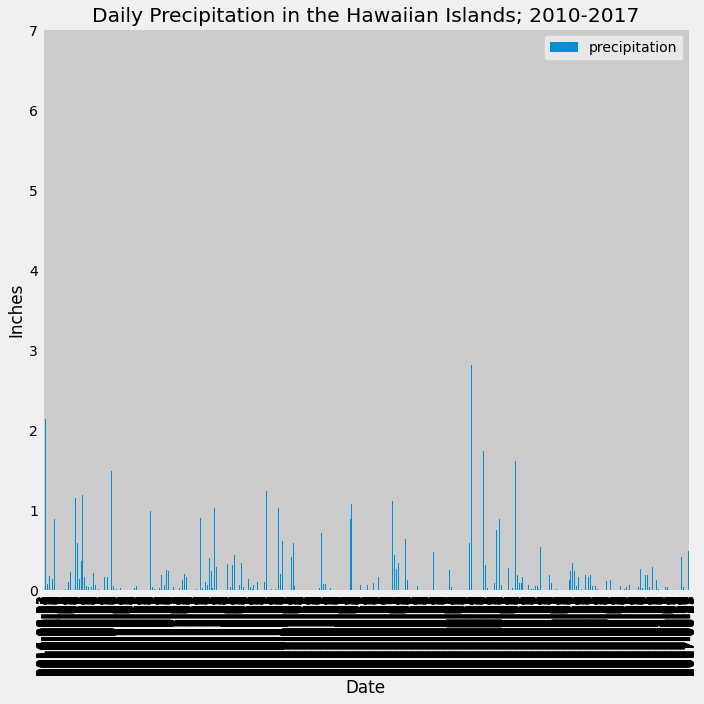

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
dailyannual_df.plot(kind="bar", figsize=(10,10))
plt.title("Daily Precipitation in the Hawaiian Islands; 2010-2017")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dailyannual_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
# Design a query to show how many stations are available in this dataset?

engine.execute('SELECT COUNT(*) FROM station').fetchall()

[(9,)]

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(precip.station, func.count(precip.tobs)).\
    group_by(precip.station).\
    order_by(func.count(precip.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature restationcorded, and average temperature of the most active station?
session.query(precip.station, func.min(precip.tobs), func.max(precip.tobs), func.avg(precip.tobs)).\
    filter(precip.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [32]:
previousyear = lastyear - dt.timedelta(days=365)
print("Year from Previous: ", previousyear)

Year from Previous:  2015-08-24


In [33]:
# Choose the station with the highest number of temperature observations.

temp = session.query(precip.date, precip.tobs).\
    filter(precip.station == 'USC00519281').\
filter(precip.date >= lastyear).all()
temp

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [34]:
tobs_df = pd.DataFrame(temp, columns=['date', 'temperature'])
tobs_df.set_index('date', inplace=True)
tobs_df

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


In [35]:
temp = tobs_df["temperature"]
temp

date
2016-08-23    77.0
2016-08-24    77.0
2016-08-25    80.0
2016-08-26    80.0
2016-08-27    75.0
              ... 
2017-08-14    77.0
2017-08-15    77.0
2017-08-16    76.0
2017-08-17    76.0
2017-08-18    79.0
Name: temperature, Length: 352, dtype: float64

Text(0.5, 1.0, 'Plot B: Instances of Recorded Tmperatures at Wathee Station, HI')

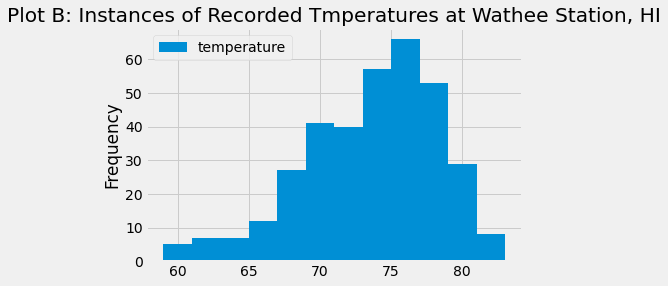

In [36]:
tobs_df.plot.hist(temp, bins=12)
plt.title("Plot B: Instances of Recorded Tmperatures at Wathee Station, HI")

In [32]:
session.close()

## Bonus Challenge Assignment

In [37]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(precip.tobs), func.avg(precip.tobs), func.max(precip.tobs)).\
        filter(precip.date >= start_date).filter(precip.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [38]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps('2016-08-07', '2016-08-21')
trip

[(71.0, 78.41237113402062, 83.0)]

In [39]:
error = trip[0][2]- trip[0][0]
error

12.0

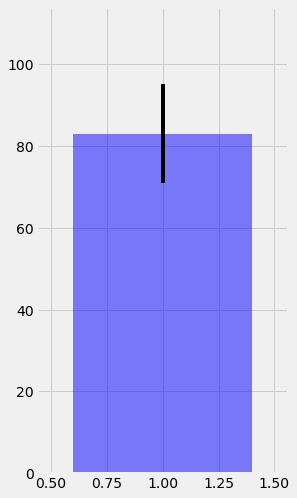

In [44]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig,ax = plt.subplots(figsize=plt.figaspect(2. ))
ax.bar (1, trip[0][2], yerr=error, color="blue", alpha=.5)
ax.margins(.2, .2)

In [45]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(precip.station, func.sum(precip.prcp)).\
filter(precip.date >= 2016-8-7).\
filter(precip.date <= 2016-8-21).\
    group_by(precip.station).\
    order_by(func.count(precip.tobs).desc()).all()

[]

In [49]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(precip.tobs), func.avg(precip.tobs), func.max(precip.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", precip.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [56]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
daily_normals("08-08")

[(68.0, 76.5576923076923, 83.0)]

In [62]:
dates = [ "08-07", "08-08", "08-09", "08-10", "08-11", "08-12", "08-13", "08-14", "08-15", "08-16", "08-17", "08-18", "08-19", "08-20", "08-21"]
dates

['08-07',
 '08-08',
 '08-09',
 '08-10',
 '08-11',
 '08-12',
 '08-13',
 '08-14',
 '08-15',
 '08-16',
 '08-17',
 '08-18',
 '08-19',
 '08-20',
 '08-21']

In [77]:
normals = []
date ={}
tmin={}
average ={}
tmax={}

for x in dates:
    normals.append(
         x, daily_normals[0][0], daily_normals[0][1], daily_normals[0][2])

normals

TypeError: 'function' object is not subscriptable

In [73]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_df = pd.DataFrame(normals, columns=['tmin','ave', 'tmax', ])
# daily_df.set_index('date', inplace=True)
daily_df




ValueError: 3 columns passed, passed data had 1 columns

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

In [ ]:
session.close()